Data Description for players.csv dataset

The players dataset concerns its game users, with variable including their subscription status, experience level, and playtime.

-The experience variable categorically classifies the user’s skill from beginner to veteran.

-The subscribe variable indicates whether the user has an active subscription.

-The hashedEmail variable indicates the user’s email through a hashed/encrypted version for identity protection.

-The played_hours variable indicates the number of hours the user has played the game.

Potential Issues

There are a few cells within the played_hours variable with a value of 0, which could either mean that the user is registered but hasn’t opened the game, or suggest a faulty system of data collection – especially pertaining to play time. Assuming that the data collection isn’t faulty, this brings up a question as to whether or not we should include observations with a play time of 0 into our analysis.

There similarly appears to be some questionable data within the name/gender variables. On multiple occasions, there is often a name (eg. Natalie) associated with the opposite gender (eg. male). This further brings to question the methods used to harvest the user’s data. Perhaps name and gender were self-reported and therefore people put whatever they want.

There are quite a few more variables than needed to answer my question of exploring the relationship between experience and subscription status. These include name, age, and gender as they don’t provide any valuable information on the relationship we are analysing, and subsequently anything from the session.csv dataset.

In [19]:
library(tidyverse)
players_data <- read_csv("players.csv")
players_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


Exploratory Data Analysis and Visualization for players.csv dataset

In [33]:
summarize(players_data,
          average_age = mean(Age,na.rm = TRUE),
          number_of_observations = nrow(players_data),
          average_play_time_in_hours = mean(played_hours,na.rm = TRUE))

average_age,number_of_observations,average_play_time_in_hours
<dbl>,<int>,<dbl>
21.13918,196,5.845918


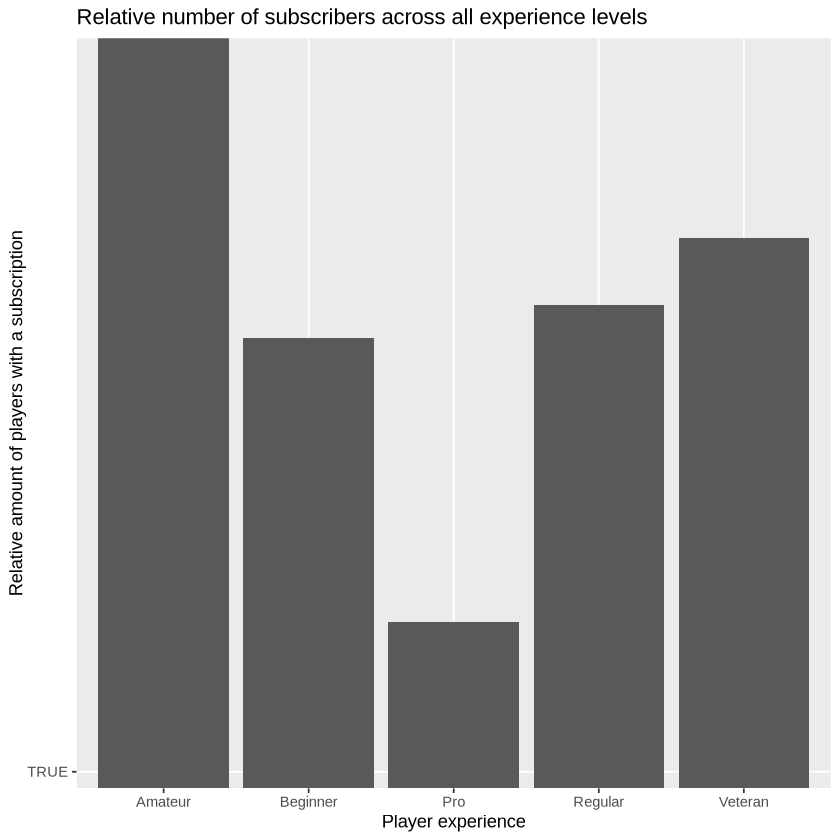

In [48]:
players_true <- filter(players_data, subscribe == "TRUE")

players_bar <- ggplot(players_true, aes(x = experience, y = subscribe))+
                geom_col()+
                labs(x = "Player experience",
       y = "Relative amount of players with a subscription",
       title = "Relative number of subscribers across all experience levels")
players_bar

The graph above compares the relative amount of subscribers across each of the five players experiences. What I inially expected was to see an upwards trend - as experience increased, so should subscriber count since I believed better players would more likely want to be more in touch with the game. Evidently, this was not the case as there is a major dip in subscribers in the "Pro" column.
*I was assuming an even distribution of players across each experience, which is could totally not be possible.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


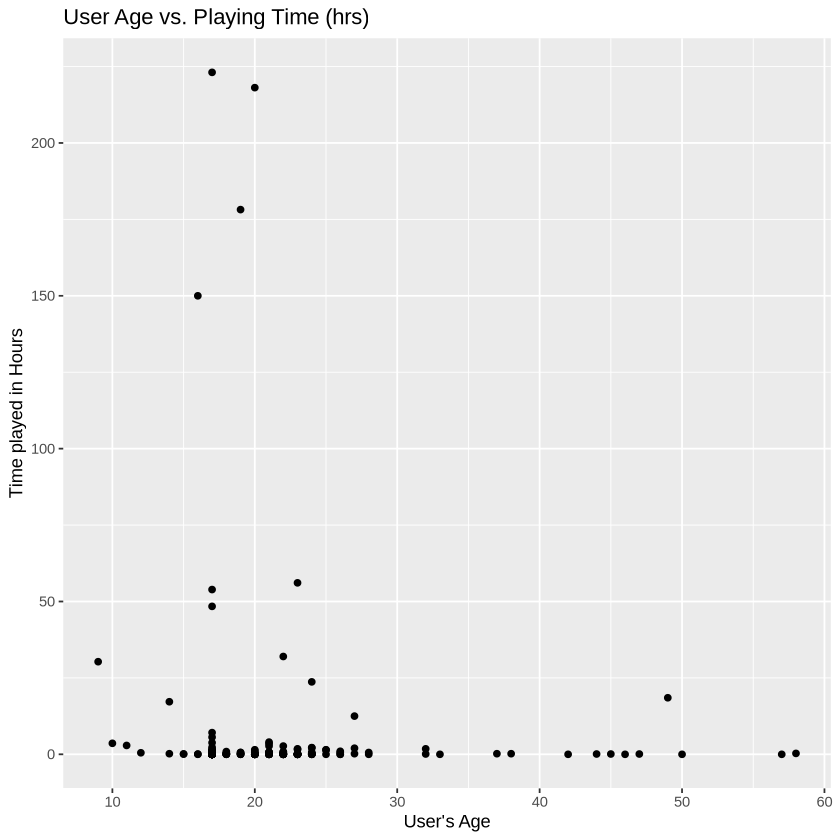

In [51]:
players_plot <- ggplot(players_data, aes(x = Age, y = played_hours)) +
    geom_point() +
    labs(x = "User's Age",
       y = "Time played in Hours",
       title = "User Age vs. Playing Time (hrs)")
players_plot

The graph above compares age to time spent playing the game. As I expected, there is somewhat a trend of young players playing considerably more than older ones (eg. 30). There are however, a couple of outliars with 150+ hours on the game, which is a significant jump from the rest of the sample. This could bring into question whether we should include them or not when taking an average, as they would be raising our considerably low mean by quite a lot.

Data Description for sessions.csv dataset

The sessions dataset concerns the start and end times each user.

-The hashedEmail variable indicates the user’s email through a hashed/encrypted version for identity protection.

-The start_time variable indicates the start time of a user’s session in human-readable from.

-The end_time variable indicates the end time of a user’s session in human-readable from.

-The original_start_time variable indicates the start time of a user’s session in Unix timestamp form.

-The original_end_time variable indicates the end time of a user’s session in Unix timestamp form.

Potential Issues

The start_time and end_time variables don’t include a specific time zone, although this wouldn’t impact the time spend in the game, it could be useful if we wanted to know when players log on.



In [20]:
library(tidyverse)
sessions_data <- read_csv("sessions.csv")
sessions_data

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


Summary statistics for sessions.csv dataset

In [32]:
sessions_data_mutated <- mutate(sessions_data,original_time_spent=original_end_time - original_start_time)
summarize(sessions_data_mutated,
          average_start_time = mean(original_start_time,na.rm = TRUE),
          number_of_observations = nrow(sessions_data),
          average_end_time = mean(original_end_time,na.rm = TRUE),
         average_time_spent_in_minutes = mean(original_time_spent/60000,na.rm = TRUE))

average_start_time,number_of_observations,average_end_time,average_time_spent_in_minutes
<dbl>,<int>,<dbl>,<dbl>
1.719201e+12,1535,1.719196e+12,48.4888


Broad Question:
What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

Specific Question:
Are more experienced players more likely to be subscribed?

Methods and Plan

The way I intend to understand whether or not more experienced players are more likely to be subscribed would be to compared the percentages of subscribed players in each experience level. If my question proves to be right, then we can expect a increase of percentage as we move from “Amateur” to “Veteran”. This method is appropriate since a K-NN classification model here would be no good as they make use of two quantitative variable to predict a class – and my analysis is trying to predict solely based on experience (one variable) – a problem that hadn’t occurred to me initially. In hindsight, predicting classification with the percentage of only one variable will likely not be very useful due to potential answers like 50%, which makes deciding the output quite difficult. On the other hand, getting percentages like 20% or 90% makes predicting the output very easy, but would naturally require a large sample size and ideally an even distribution of players in each experience level to get an accurate read on the percentages of them being subscribed. This condition will be very tough to meet given that players in this dataset are random and so are their experience level, which is a big limiting factor to this method.
A way to go about implementing this method would be to first filter out each of the experience level separately to be then able to count the number of observations. From there, you can filter out all the “TRUTH” out of the subscribe variable, and dividing that number by the total observations for the experience level gets you the percentage.
